# Grove 조도 센서 예제
----
* [개요](#개요)
* [보드 설정하기](#보드-설정하기)
* [센서 설정과 센서 값 읽기](#센서-설정과-센서-값-읽기)
* [그래프 그리기](#그래프-그리기)

----
## 개요

이 예제는 [Grove Light Sensor v1.1](http://www.seeedstudio.com/wiki/Grove_-_Light_Sensor)를 사용하는 방법과 matplotlib를 사용하여 그래프를 그리는 방법을 보여준다.

Grove 조도 센서는 ADC가 필요한 아날로그 신호를 생성한다.

Grove 광 센서, Pynq Grove 어댑터 및 Grove ADC는이 예제에서 사용된다.

Grove ADC는 I2C 주변 장치이다.


주변 빛의 세기가 증가하면 LDR 또는 Photoresistor의 저항이 감소한다. 즉, 이 모듈의 출력 신호는 밝은 빛에서는 HIGH가되고 어둠에서는 LOW가 된다. 센서 값의 범위는 ~ 5.0 (밝음) ~> 100.0 (어둡움)이다. 이 센서는 어두움에 더 민감하다.

----
## 보드 설정하기

Base Overlay를 로드하여 시작하라.

In [6]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

#### 주변 장치를 보드에 연결하라
1. Pynq Grove 어댑터를 ***PMODB에 연결하라.***
2. ***Grove ADC*** 포트 ***J1***(SCL, SDA, VCC, GND)을 Pynq Grove 어댑터의 ***G4*** 포트에 연결하라.
3. ***Grove ALS***을 ***Grove ADC***(GND, VCC, NC, SIG)의 포트 ***J2***에 연결하라.

----

## 센서 설정과 센서 값 읽기
Grove ADC는 먼저 데이터 값을 저항 값 단위로 바꾼 뒤 온도 값으로 변환하는 과정을 가진다.
이 챕터는 ADC에 연결된 Grove Light 센서를 읽는 방법을 보여준다.

In [7]:
from pynq.lib.pmod import Grove_Light
from pynq.lib.pmod import PMOD_GROVE_G4 # Import constants

# Grove2pmod is connected to PMODB (2)
# Grove ADC is connected to G4 (pins [6,2])
lgt = Grove_Light(base.PMODB, PMOD_GROVE_G4)

In [8]:
sensor_val = lgt.read()
print(sensor_val)

5.67


주변 장치는 센서가 위에서 선언 될 때 인터페이스와 포트를 지정하여 다른 포트에 연결할 수 있다.

### 10 초마다 100ms마다 한 번씩 로깅하기

다음 셀을 실행하면 센서 값이 100ms마다 로깅되기 시작하고 10 초 동안 실행된다. 광 센서를 덮거나 커버를 열어 측정 된 신호를 변화시킬 수 있다.

아래 셀에서 값 100과 10을 변경하여 로깅 간격과 지속 시간을 변경할 수 있다.

In [9]:
import time

lgt.set_log_interval_ms(100)
lgt.start_log()
time.sleep(10) # Change input during this time
r_log = lgt.get_log()

----
## 그래프를 표시합니다.

이 예제에서는 10 초 동안 여러 값을 읽는다.

광도를 변경하려면 광 센서에 빛이 들어오지 않도록 덥거나 열면 된다. 일반적인 밝기에서는 센서가 이미 전체 밝기 범위로 판독 중이므로 외부 광원을 제공할 필요가 없다.

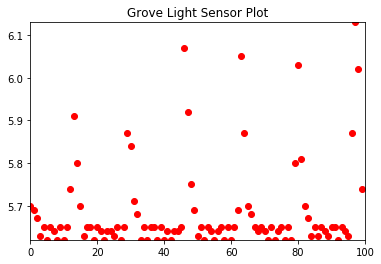

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(r_log)), r_log, 'ro')
plt.title('Grove Light Sensor Plot')
min_r_log = min(r_log)
max_r_log = max(r_log)
plt.axis([0, len(r_log), min_r_log, max_r_log])
plt.show()